In [ ]:
import pandas as pd        
import csv 
import warnings 
from datetime import datetime
warnings.filterwarnings("ignore")


In [ ]:
df= pd.read_csv(r"flights.csv")
df.head(2)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,United Air Lines Inc.


In [ ]:
columns_to_keep = [
    'year', 'month', 'day',
    'dep_time', 'sched_dep_time', 'dep_delay',
    'arr_time', 'sched_arr_time', 'arr_delay',
    'carrier', 'flight', 'origin', 'dest',
    'air_time', 'distance', 'name'
]

df = df[columns_to_keep]
df.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,Delta Air Lines Inc.


In [ ]:
df.isnull().sum()


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
origin               0
dest                 0
air_time          9430
distance             0
name                 0
dtype: int64

In [7]:
# Drop rows with missing dep_time, arr_time, dep_delay, arr_delay, air_time
df = df.dropna(subset=[
    'dep_time', 'arr_time',
    'dep_delay', 'arr_delay',
    'air_time'
])

# Check again to confirm
df.isnull().sum()


year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
air_time          0
distance          0
name              0
dtype: int64

In [8]:
# 1. Drop rows with missing critical data
df = df.dropna(subset=[
    'dep_time', 'arr_time',
    'dep_delay', 'arr_delay',
    'air_time'
])

# 2. Then apply the time conversion
def convert_time_column(series):
    return pd.to_datetime(series.astype(int).astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

df['dep_time'] = convert_time_column(df['dep_time'])
df['sched_dep_time'] = convert_time_column(df['sched_dep_time'])
df['arr_time'] = convert_time_column(df['arr_time'])
df['sched_arr_time'] = convert_time_column(df['sched_arr_time'])

# 3. Confirm
df.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,name
0,2013,1,1,05:17:00,05:15:00,2.0,08:30:00,08:19:00,11.0,UA,1545,EWR,IAH,227.0,1400,United Air Lines Inc.
1,2013,1,1,05:33:00,05:29:00,4.0,08:50:00,08:30:00,20.0,UA,1714,LGA,IAH,227.0,1416,United Air Lines Inc.
2,2013,1,1,05:42:00,05:40:00,2.0,09:23:00,08:50:00,33.0,AA,1141,JFK,MIA,160.0,1089,American Airlines Inc.
3,2013,1,1,05:44:00,05:45:00,-1.0,10:04:00,10:22:00,-18.0,B6,725,JFK,BQN,183.0,1576,JetBlue Airways
4,2013,1,1,05:54:00,06:00:00,-6.0,08:12:00,08:37:00,-25.0,DL,461,LGA,ATL,116.0,762,Delta Air Lines Inc.


In [ ]:
df.to_csv("flights_cleaned.csv", index=False)


## Q1. Which airline has the highest average departure delay?
#### This is a very useful business KPI — it helps airports & passengers know which carriers are less punctual.

Top Airlines by Average Departure Delay:

name
Frontier Airlines Inc.         20.201175
ExpressJet Airlines Inc.       19.838929
Mesa Airlines Inc.             18.898897
AirTran Airways Corporation    18.605984
Southwest Airlines Co.         17.661657
Endeavor Air Inc.              16.439574
JetBlue Airways                12.967548
Virgin America                 12.756646
SkyWest Airlines Inc.          12.586207
United Air Lines Inc.          12.016908
Name: dep_delay, dtype: float64


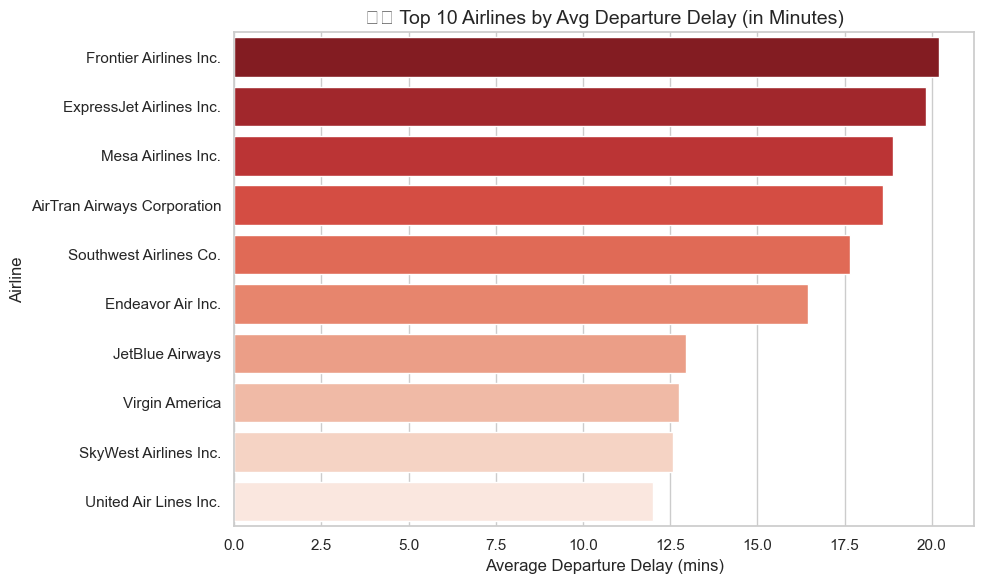

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
# Set style
sns.set(style="whitegrid")

# Group by airline and calculate average departure delay
avg_dep_delay = df.groupby('name')['dep_delay'].mean().sort_values(ascending=False)

# Display top 10
print("Top Airlines by Average Departure Delay:\n")
print(avg_dep_delay.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_dep_delay.values[:10], y=avg_dep_delay.index[:10], palette="Reds_r")
plt.title("✈️ Top 10 Airlines by Avg Departure Delay (in Minutes)", fontsize=14)
plt.xlabel("Average Departure Delay (mins)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


# 🔎 Q2. Which route (origin → destination) has the most number of flights?

🛫 Top 10 Busiest Flight Routes:

JFK ➝ LAX    11159
LGA ➝ ATL    10041
LGA ➝ ORD     8507
JFK ➝ SFO     8109
LGA ➝ CLT     5961
EWR ➝ ORD     5828
JFK ➝ BOS     5773
LGA ➝ MIA     5702
JFK ➝ MCO     5429
EWR ➝ BOS     5247
Name: route, dtype: int64


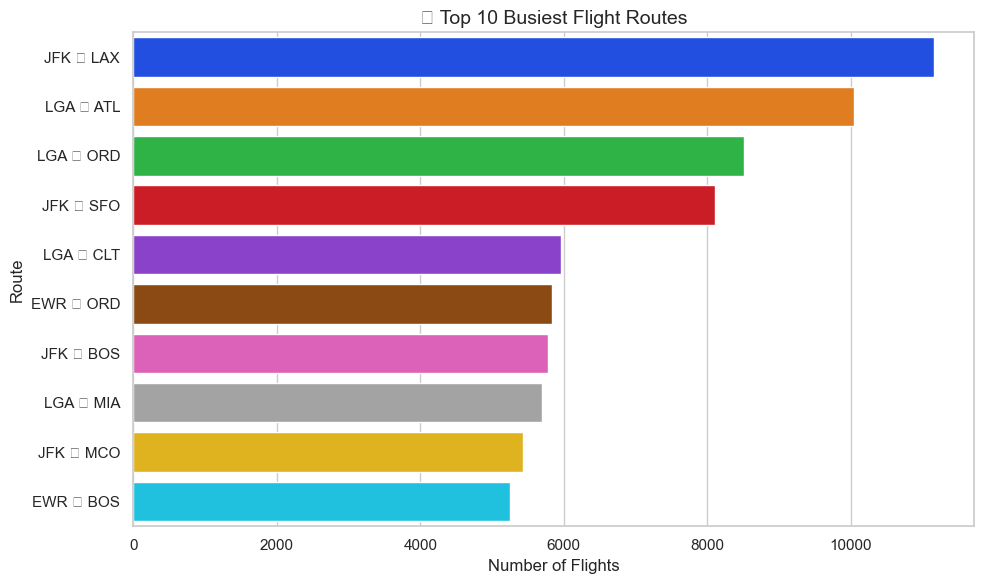

In [20]:
# Create a new route column
df['route'] = df['origin'] + " ➝ " + df['dest']

# Count the number of flights per route
route_counts = df['route'].value_counts().head(10)

# Display the top 10 busiest routes
print("🛫 Top 10 Busiest Flight Routes:\n")
print(route_counts)

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x=route_counts.values, y=route_counts.index, palette='bright')
plt.title("🛬 Top 10 Busiest Flight Routes", fontsize=14)
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


# 🔎 Q3. Which airline has the longest average air time?

✈️ Airlines with Longest Avg Air Time:

name
Hawaiian Airlines Inc.         623.087719
Virgin America                 337.002346
Alaska Airlines Inc.           325.617772
Frontier Airlines Inc.         229.599119
United Air Lines Inc.          211.791354
American Airlines Inc.         188.822299
Delta Air Lines Inc.           173.688804
JetBlue Airways                151.177173
Southwest Airlines Co.         147.824809
AirTran Airways Corporation    101.143937
Name: air_time, dtype: float64


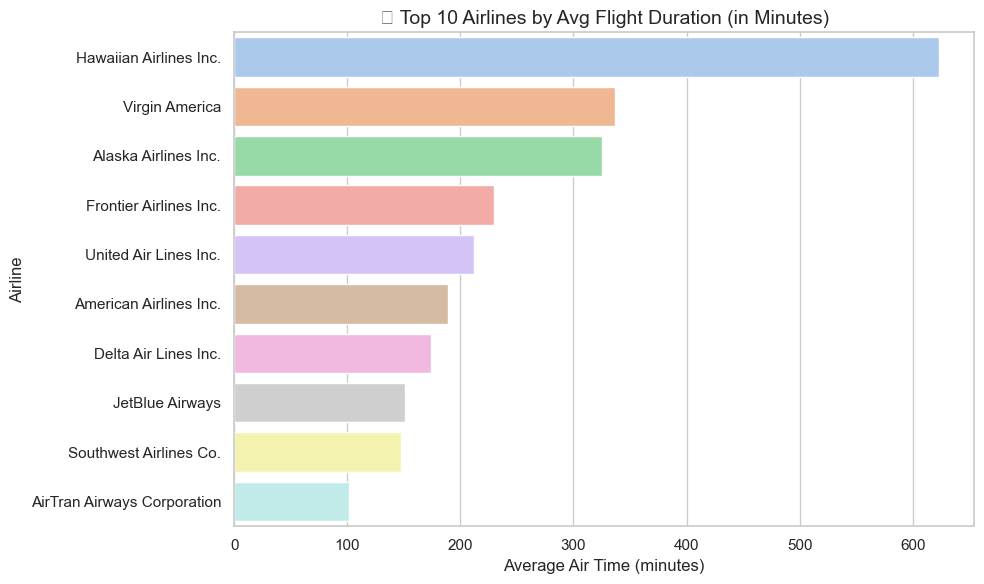

In [ ]:
# Group by airline name and calculate average air time
avg_airtime = df.groupby('name')['air_time'].mean().sort_values(ascending=False)

# Display top 10
print("✈️ Airlines with Longest Avg Air Time:\n")
print(avg_airtime.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_airtime.values[:10], y=avg_airtime.index[:10], palette='pastel')
plt.title("🕒 Top 10 Airlines by Avg Flight Duration (in Minutes)", fontsize=14)
plt.xlabel("Average Air Time (minutes)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


# 🔎 Q4. What time of day sees the most flight departures?

⏰ Number of Flights per Hour of the Day:

5      1940
6     25447
7     22475
8     26734
9     19931
10    16370
11    15689
12    17744
13    19457
14    21022
15    23082
16    22045
17    23667
18    21072
19    20507
20    16061
21    10503
22     2558
23     1042
Name: dep_hour, dtype: int64


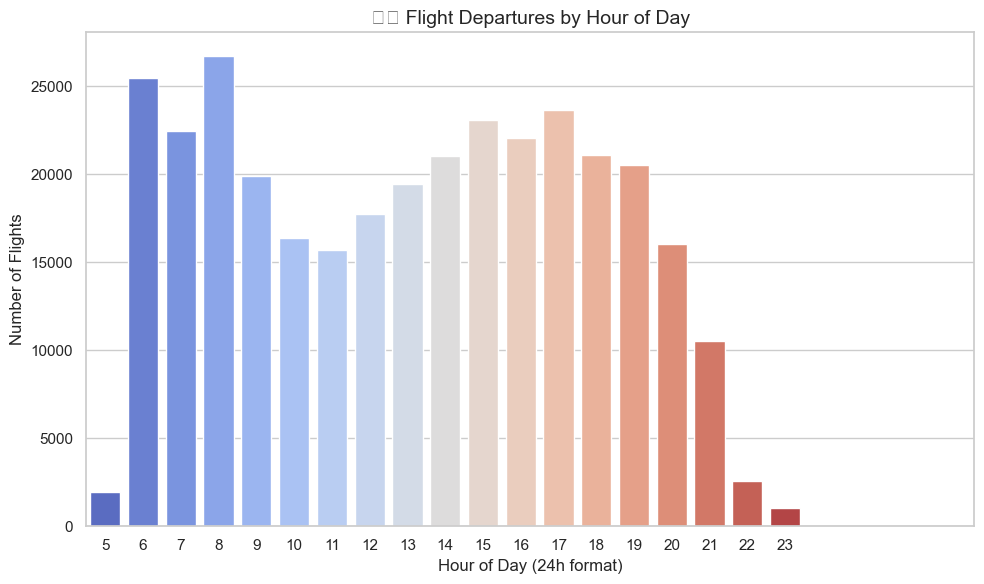

In [ ]:
# Extract hour from scheduled departure time
df['dep_hour'] = pd.to_datetime(df['sched_dep_time'].astype(str)).dt.hour

# Count number of flights by hour
hourly_flights = df['dep_hour'].value_counts().sort_index()

# Display
print("⏰ Number of Flights per Hour of the Day:\n")
print(hourly_flights)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_flights.index, y=hourly_flights.values, palette='coolwarm')
plt.title("⏱️ Flight Departures by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24h format)")
plt.ylabel("Number of Flights")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


# 5. Which origin airport has the highest number of departing flights?

🛫 Top Origin Airports by Number of Departures:

EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64


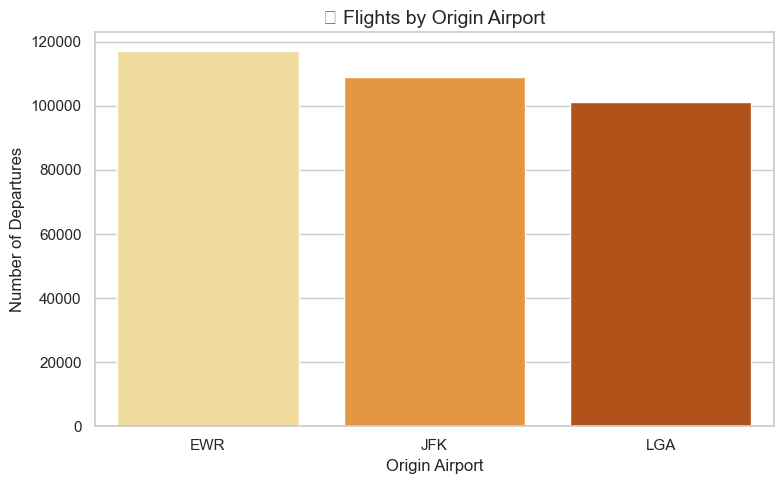

In [ ]:
# Count number of flights by origin airport
origin_counts = df['origin'].value_counts()

# Display top origins
print("🛫 Top Origin Airports by Number of Departures:\n")
print(origin_counts)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette="YlOrBr")
plt.title("🛫 Flights by Origin Airport", fontsize=14)
plt.xlabel("Origin Airport")
plt.ylabel("Number of Departures")
plt.tight_layout()
plt.show()


# 🔎 Q6. Which airline has the highest average arrival delay?

📊 Top Airlines by Avg Arrival Delay:

name
Frontier Airlines Inc.         21.920705
AirTran Airways Corporation    20.115906
ExpressJet Airlines Inc.       15.796431
Mesa Airlines Inc.             15.556985
SkyWest Airlines Inc.          11.931034
Envoy Air                      10.774733
Southwest Airlines Co.          9.649120
JetBlue Airways                 9.457973
Endeavor Air Inc.               7.379669
United Air Lines Inc.           3.558011
Name: arr_delay, dtype: float64


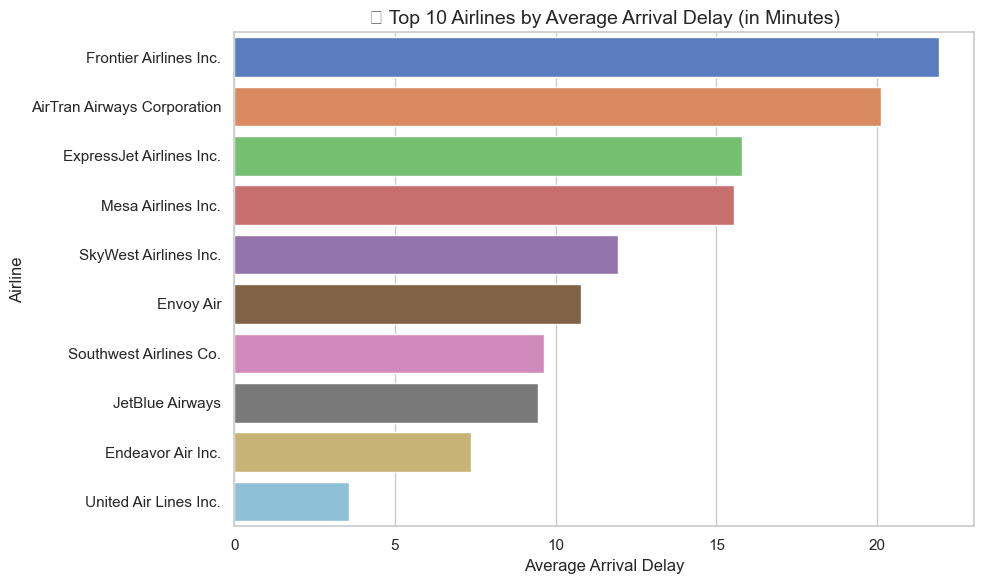

In [ ]:
# Group by airline and calculate average arrival delay
avg_arr_delay = df.groupby('name')['arr_delay'].mean().sort_values(ascending=False)

# Show top 10
print("📊 Top Airlines by Avg Arrival Delay:\n")
print(avg_arr_delay.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_arr_delay.values[:10], y=avg_arr_delay.index[:10], palette='muted')
plt.title("🕑 Top 10 Airlines by Average Arrival Delay (in Minutes)", fontsize=14)
plt.xlabel("Average Arrival Delay")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


# Q7. Which flights cover the longest distances?

🌍 Top 10 Longest Flights by Distance:

       carrier  flight origin dest  distance                    name
50676       HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
108078      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
100067      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
179566      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
30229       HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
328582      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
9947        HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
269447      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
141043      HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.
18433       HA      51    JFK  HNL      4983  Hawaiian Airlines Inc.


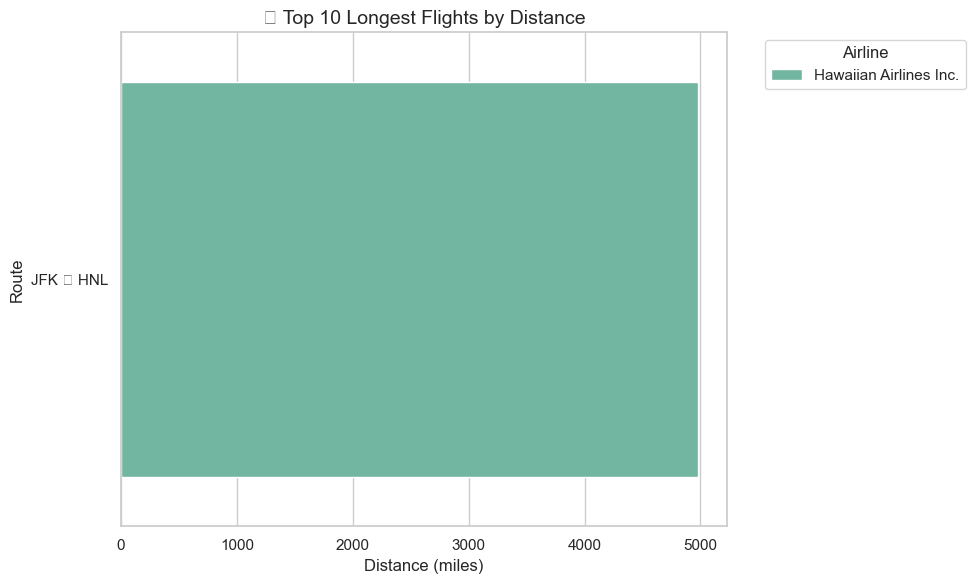

In [ ]:
# Sort dataset by distance in descending order
top_longest_flights = df.sort_values(by='distance', ascending=False).head(10)

# Display the top 10 longest flights
print("🌍 Top 10 Longest Flights by Distance:\n")
print(top_longest_flights[['carrier', 'flight', 'origin', 'dest', 'distance', 'name']])

# Create a label column for better plotting
top_longest_flights['route'] = top_longest_flights['origin'] + " ➝ " + top_longest_flights['dest']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_longest_flights['distance'],
    y=top_longest_flights['route'],
    hue=top_longest_flights['name'],
    dodge=False,
    palette='Set2'
)
plt.title("🌐 Top 10 Longest Flights by Distance", fontsize=14)
plt.xlabel("Distance (miles)")
plt.ylabel("Route")
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Q8. Which routes have the highest average arrival delays?

🚨 Top 10 Routes with Highest Avg Arrival Delay:

route
EWR ➝ CAE    44.585106
EWR ➝ TYS    41.150160
EWR ➝ TUL    33.659864
EWR ➝ OKC    30.619048
EWR ➝ JAC    29.894737
EWR ➝ RIC    25.820433
EWR ➝ MKE    24.003781
EWR ➝ DSM    23.548718
EWR ➝ MSN    23.197101
EWR ➝ PWM    23.005479
Name: arr_delay, dtype: float64


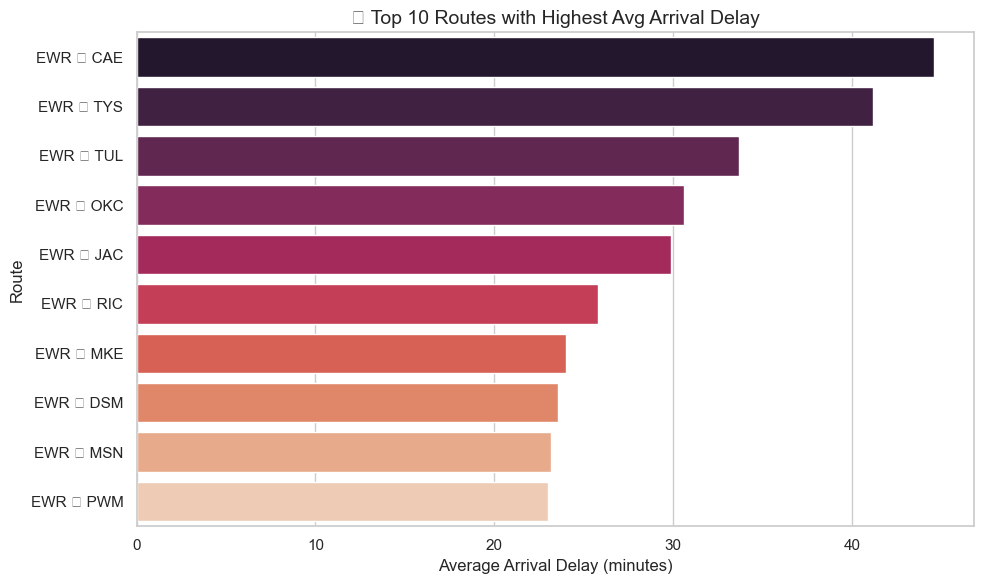

In [ ]:
# Create route column
df['route'] = df['origin'] + " ➝ " + df['dest']

# Group by route and calculate average arrival delay
avg_delay_by_route = df.groupby('route')['arr_delay'].mean().sort_values(ascending=False).head(10)

# Display top 10 delayed routes
print("🚨 Top 10 Routes with Highest Avg Arrival Delay:\n")
print(avg_delay_by_route)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_delay_by_route.values, y=avg_delay_by_route.index, palette="rocket")
plt.title("🚨 Top 10 Routes with Highest Avg Arrival Delay", fontsize=14)
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


# Q9. Which airline operates the most number of flights?

🛫 Top 10 Airlines by Number of Flights:

United Air Lines Inc.       58665
JetBlue Airways             54635
ExpressJet Airlines Inc.    54173
Delta Air Lines Inc.        48110
American Airlines Inc.      32729
Envoy Air                   26397
US Airways Inc.             20536
Endeavor Air Inc.           18460
Southwest Airlines Co.      12275
Virgin America               5162
Name: name, dtype: int64


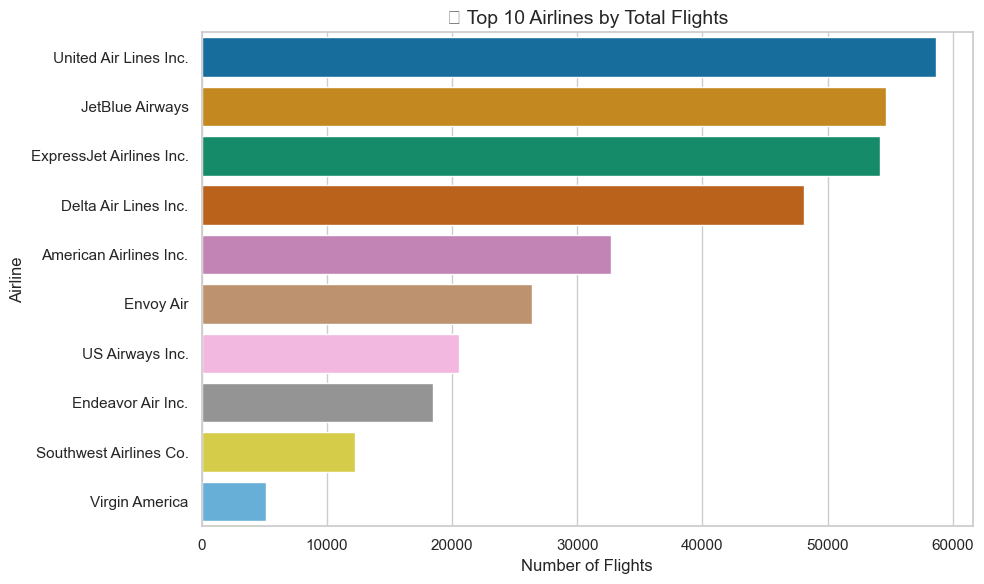

In [ ]:
# Count number of flights per airline
flight_counts = df['name'].value_counts().head(10)

# Display top 10 airlines by number of flights
print("🛫 Top 10 Airlines by Number of Flights:\n")
print(flight_counts)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=flight_counts.values, y=flight_counts.index, palette='colorblind')
plt.title("🛫 Top 10 Airlines by Total Flights", fontsize=14)
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


#  Q10. How many flights were either cancelled or delayed by over 1 hour?

⏱️ Number of flights delayed by over 1 hour: 28317


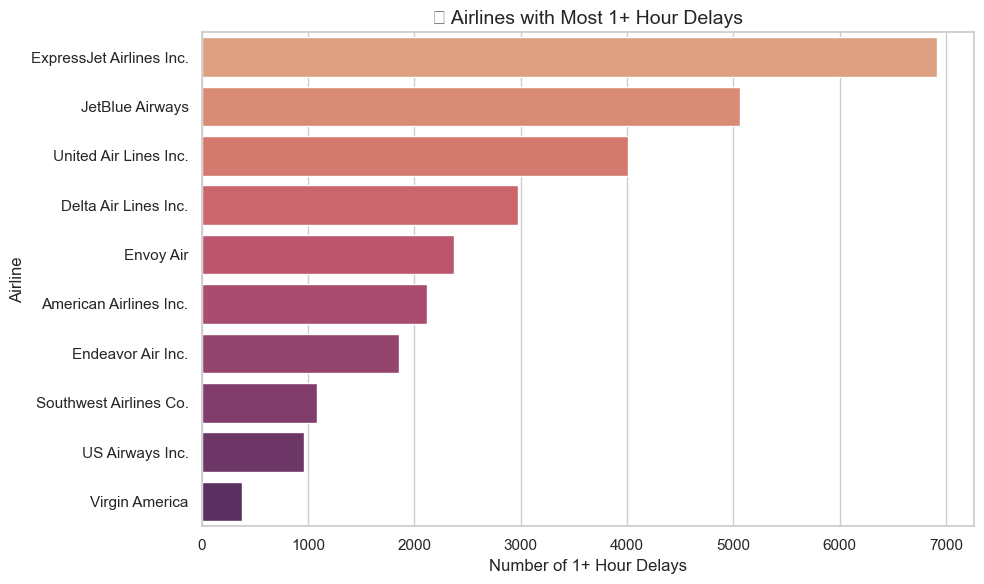

In [ ]:
# Count flights with arrival delay over 60 minutes
long_delays = df[df['arr_delay'] >= 60]

# Display count
print(f"⏱️ Number of flights delayed by over 1 hour: {len(long_delays)}")

# Show top airlines responsible for these delays
delay_by_airline = long_delays['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=delay_by_airline.values, y=delay_by_airline.index, palette='flare')
plt.title("⏰ Airlines with Most 1+ Hour Delays", fontsize=14)
plt.xlabel("Number of 1+ Hour Delays")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


# Q11. How many flights arrived on time or earlier?

✅ Number of on-time or early arrivals: 194342
📊 Percentage of on-time flights: 57.71%


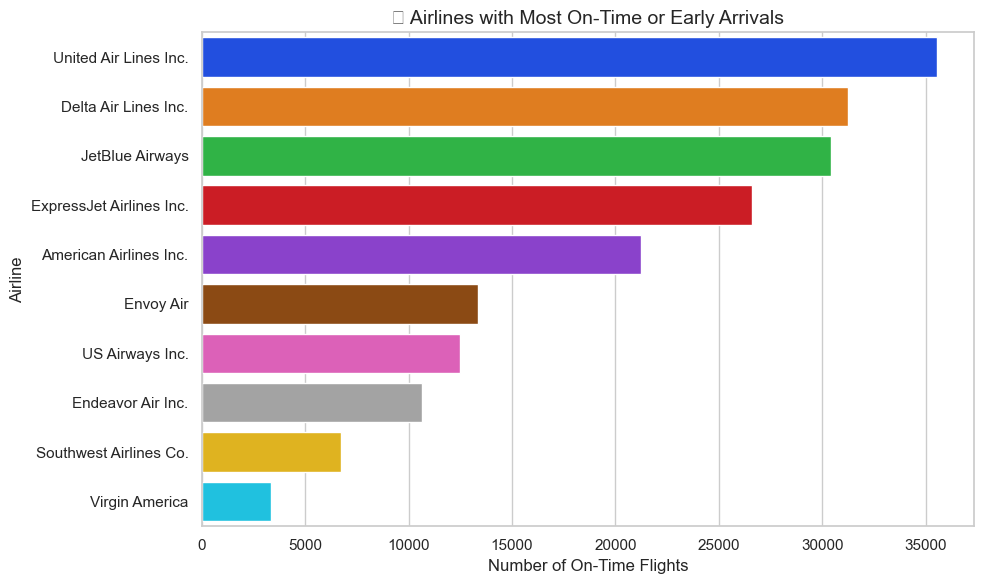

In [ ]:
# Filter flights that arrived on time or earlier
on_time_flights = df[df['arr_delay'] <= 0]

# Display count
print(f"✅ Number of on-time or early arrivals: {len(on_time_flights)}")

# Percentage of total
total_flights = len(df)
percentage_on_time = (len(on_time_flights) / total_flights) * 100
print(f"📊 Percentage of on-time flights: {percentage_on_time:.2f}%")

# Top airlines with most on-time arrivals
on_time_by_airline = on_time_flights['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=on_time_by_airline.values, y=on_time_by_airline.index, palette='bright')
plt.title("✅ Airlines with Most On-Time or Early Arrivals", fontsize=14)
plt.xlabel("Number of On-Time Flights")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


#  Q12. What is the on-time arrival percentage for each airline?

✅ Top 10 Airlines by On-Time Arrival Percentage:

name
Alaska Airlines Inc.      72.829132
Hawaiian Airlines Inc.    71.637427
Virgin America            65.284773
Delta Air Lines Inc.      64.944918
American Airlines Inc.    64.899630
US Airways Inc.           60.781067
United Air Lines Inc.     60.615358
SkyWest Airlines Inc.     59.375000
Endeavor Air Inc.         57.730228
JetBlue Airways           55.715201
dtype: float64


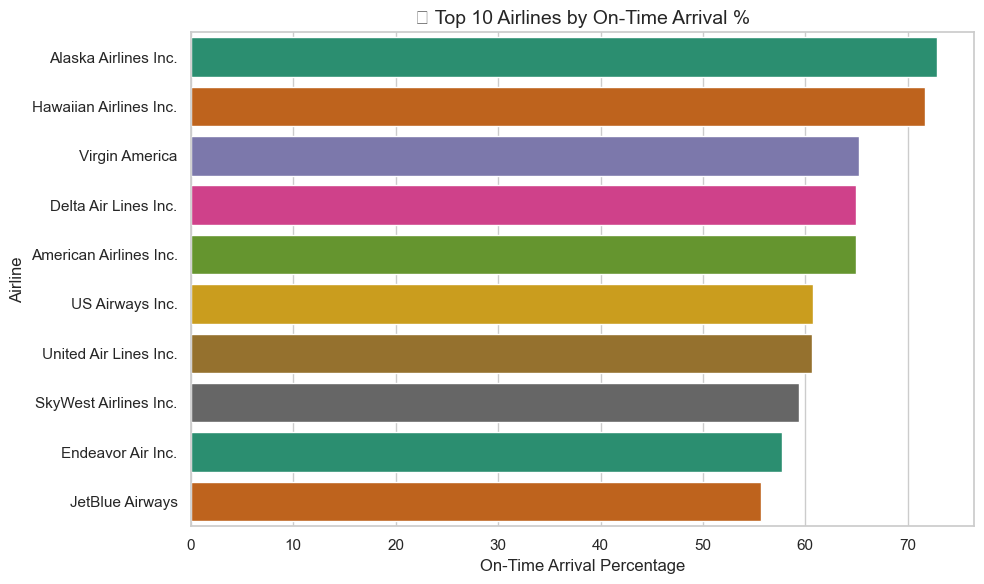

In [ ]:
# Total flights per airline
total_by_airline = df.groupby('name').size()

# On-time flights per airline (arr_delay <= 0)
on_time_by_airline = df[df['arr_delay'] <= 0].groupby('name').size()

# Calculate on-time percentage
on_time_percentage = (on_time_by_airline / total_by_airline * 100).sort_values(ascending=False)

# Display top 10
print("✅ Top 10 Airlines by On-Time Arrival Percentage:\n")
print(on_time_percentage.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=on_time_percentage.values[:10], y=on_time_percentage.index[:10], palette='Dark2')
plt.title("✅ Top 10 Airlines by On-Time Arrival %", fontsize=14)
plt.xlabel("On-Time Arrival Percentage")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


# Q13. Which destination airports have the most delayed arrivals on average?

🚨 Destination Airports with Most Arrival Delay (avg):

dest
CAE    41.764151
TUL    33.659864
OKC    30.619048
JAC    28.095238
TYS    24.069204
MSN    20.196043
RIC    20.111253
CAK    19.698337
DSM    19.005736
GRR    18.189560
Name: arr_delay, dtype: float64


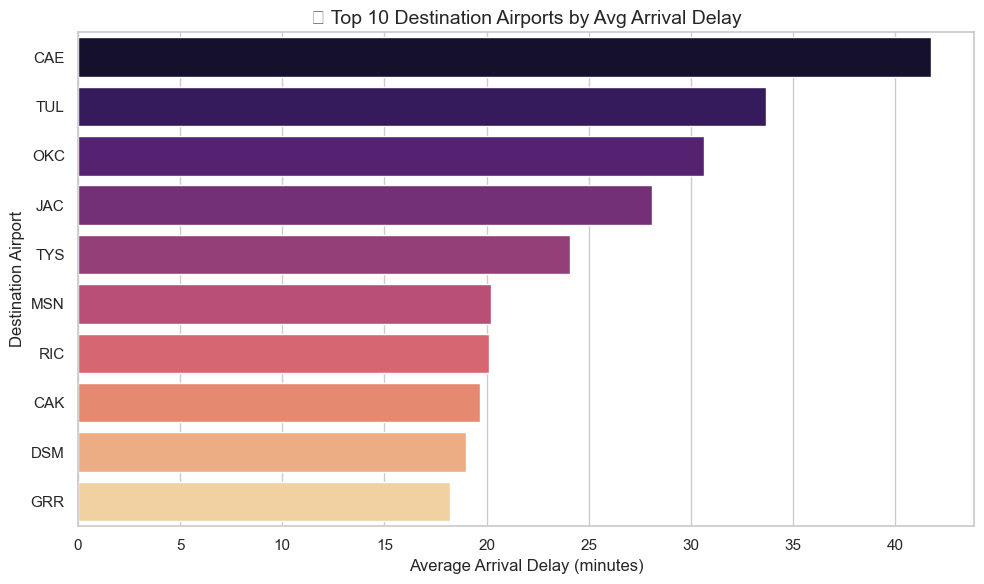

In [ ]:
# Group by destination airport and calculate average arrival delay
avg_delay_by_dest = df.groupby('dest')['arr_delay'].mean().sort_values(ascending=False).head(10)

# Display top 10 destination airports with highest avg arrival delay
print("🚨 Destination Airports with Most Arrival Delay (avg):\n")
print(avg_delay_by_dest)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_delay_by_dest.values, y=avg_delay_by_dest.index, palette='magma')
plt.title("🚨 Top 10 Destination Airports by Avg Arrival Delay", fontsize=14)
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Destination Airport")
plt.tight_layout()
plt.show()


#  Q14. Which airlines cover the longest average flight distances?

🌍 Top 10 Airlines by Average Flight Distance:

name
Hawaiian Airlines Inc.         4983.000000
Virgin America                 2499.482177
Alaska Airlines Inc.           2402.000000
Frontier Airlines Inc.         1620.000000
United Air Lines Inc.          1529.114873
American Airlines Inc.         1340.235999
Delta Air Lines Inc.           1236.901206
JetBlue Airways                1068.621525
Southwest Airlines Co.          996.269084
AirTran Airways Corporation     664.829448
Name: distance, dtype: float64


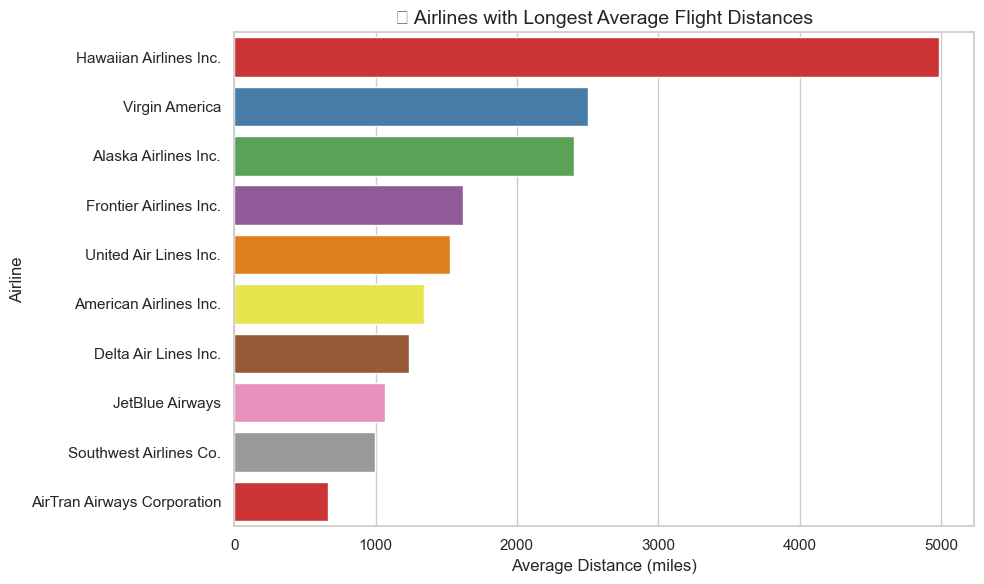

In [ ]:
# Group by airline and calculate average flight distance
avg_distance_by_airline = df.groupby('name')['distance'].mean().sort_values(ascending=False)

# Display top 10
print("🌍 Top 10 Airlines by Average Flight Distance:\n")
print(avg_distance_by_airline.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_distance_by_airline.values[:10], y=avg_distance_by_airline.index[:10], palette='Set1')
plt.title("🌐 Airlines with Longest Average Flight Distances", fontsize=14)
plt.xlabel("Average Distance (miles)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()
